In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
import_path = "/Users/michalmacbookpro/Downloads/titanic/"
train = pd.read_csv(import_path + "train.csv",index_col="PassengerId")
test = pd.read_csv(import_path + "test.csv",index_col="PassengerId")
submision = pd.read_csv(import_path + "gender_submission.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
train["Age"].fillna(np.mean(train["Age"]),inplace=True)

In [5]:
def titulizer(df):
    df["Title"] = df["Name"].str.extract(r"([A-Za-z]+\.)")
    df["Title"].replace(
        ['Capt.', 'Col.','Major.',"Master.",'Master.',
         'Countess.', 'Don.', 'Dona.', 'Dr.', 'Jonkheer.', 
         'Lady.', 'Rev.', 'Sir.'], 'Rare.', 
        inplace = True)
    df["Title"].replace(['Mlle.', 'Ms.'], 'Miss.', inplace = True)
    df["Title"].replace(['Mme.'], 'Mrs.', inplace = True)
    return df

def familiazer(df):
    df["Family"] = df["SibSp"] + df["Parch"] + 1
    df["Family"] = df["Family"]
    return df

def cabinizer(df):
    df["Cabin_L"] = df["Cabin"].str.extract(r"(^\D{0,1})")
    df["Cabin_L"].fillna("U",inplace=True)
    df["Cabin_L"] = df["Cabin_L"].map({"A":"ABC","B":"ABC","C":"ABC","D":"DE","E":"DE","F":"FG","G":"FG","T":"ABC","U":"U"})
    return df

In [6]:
titulizer(train)
familiazer(train)
cabinizer(train)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family,Cabin_L
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Mr.,2,U
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs.,2,ABC
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,1,U
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Mrs.,2,ABC
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Mr.,1,U
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,Rare.,1,U
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,Miss.,1,ABC
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,Miss.,4,U


In [8]:
to_drop=["Name", "Ticket","Cabin"]
train.drop(to_drop,inplace=True,axis=1)

In [9]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family,Cabin_L
PassengerId,,,,,,,,,,,
1,0,3,male,22.000000,1,0,7.2500,S,Mr.,2,U
2,1,1,female,38.000000,1,0,71.2833,C,Mrs.,2,ABC
3,1,3,female,26.000000,0,0,7.9250,S,Miss.,1,U
4,1,1,female,35.000000,1,0,53.1000,S,Mrs.,2,ABC
5,0,3,male,35.000000,0,0,8.0500,S,Mr.,1,U
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.000000,0,0,13.0000,S,Rare.,1,U
888,1,1,female,19.000000,0,0,30.0000,S,Miss.,1,ABC
889,0,3,female,29.699118,1,2,23.4500,S,Miss.,4,U


In [11]:
#train["Fare"] = (train["Fare"]-np.mean(train["Fare"]))/np.std(train["Fare"])
train['Age_bin'] = pd.cut(train['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])
train['Fare_bin'] = pd.cut(train['Fare'], bins=[0,7.91,14.45,31,120], labels=['Low_fare','median_fare','Average_fare','high_fare'])
train[["Class_1","Class_2","Class_3"]] = pd.get_dummies(train["Pclass"])
train[["ABC","DE","FG","U"]] = pd.get_dummies(train["Cabin_L"])
train[["Miss.","Mr.","Mrs.","Rare."]] = pd.get_dummies(train["Title"])
train[["female","male"]] = pd.get_dummies(train["Sex"])
train

In [12]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family,Cabin_L,Age_bin,Fare_bin
PassengerId,,,,,,,,,,,,,
1,0,3,male,22.000000,1,0,7.2500,S,Mr.,2,U,Adult,Low_fare
2,1,1,female,38.000000,1,0,71.2833,C,Mrs.,2,ABC,Adult,high_fare
3,1,3,female,26.000000,0,0,7.9250,S,Miss.,1,U,Adult,median_fare
4,1,1,female,35.000000,1,0,53.1000,S,Mrs.,2,ABC,Adult,high_fare
5,0,3,male,35.000000,0,0,8.0500,S,Mr.,1,U,Adult,median_fare
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.000000,0,0,13.0000,S,Rare.,1,U,Adult,median_fare
888,1,1,female,19.000000,0,0,30.0000,S,Miss.,1,ABC,Teenage,Average_fare
889,0,3,female,29.699118,1,2,23.4500,S,Miss.,4,U,Adult,Average_fare


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family,Cabin_L,Age_bin,Fare_bin,Class_1,Class_2,Class_3,ABC,DE,FG,U
PassengerId,,,,,,,,,,,,,,,,,,,,
1,0,3,male,22.000000,1,0,7.2500,S,Mr.,2,U,Adult,Low_fare,0,0,1,0,0,0,1
2,1,1,female,38.000000,1,0,71.2833,C,Mrs.,2,ABC,Adult,high_fare,1,0,0,1,0,0,0
3,1,3,female,26.000000,0,0,7.9250,S,Miss.,1,U,Adult,median_fare,0,0,1,0,0,0,1
4,1,1,female,35.000000,1,0,53.1000,S,Mrs.,2,ABC,Adult,high_fare,1,0,0,1,0,0,0
5,0,3,male,35.000000,0,0,8.0500,S,Mr.,1,U,Adult,median_fare,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.000000,0,0,13.0000,S,Rare.,1,U,Adult,median_fare,0,1,0,0,0,0,1
888,1,1,female,19.000000,0,0,30.0000,S,Miss.,1,ABC,Teenage,Average_fare,1,0,0,1,0,0,0
889,0,3,female,29.699118,1,2,23.4500,S,Miss.,4,U,Adult,Average_fare,0,0,1,0,0,0,1


In [20]:
train[["C","Q","S"]] = pd.get_dummies(train["Embarked"])
train[["low","medium","average","high"]] = pd.get_dummies(train["Fare_bin"])
train[["chiildren","teenager","adult","Elder"]] = pd.get_dummies(train["Age_bin"])
to_drop = ["Pclass","Sex", "Embarked","Title","Fare","Age", "Cabin_L","Age_bin","Fare_bin"]
train.drop(to_drop,inplace=True, axis=1)

<AxesSubplot:>

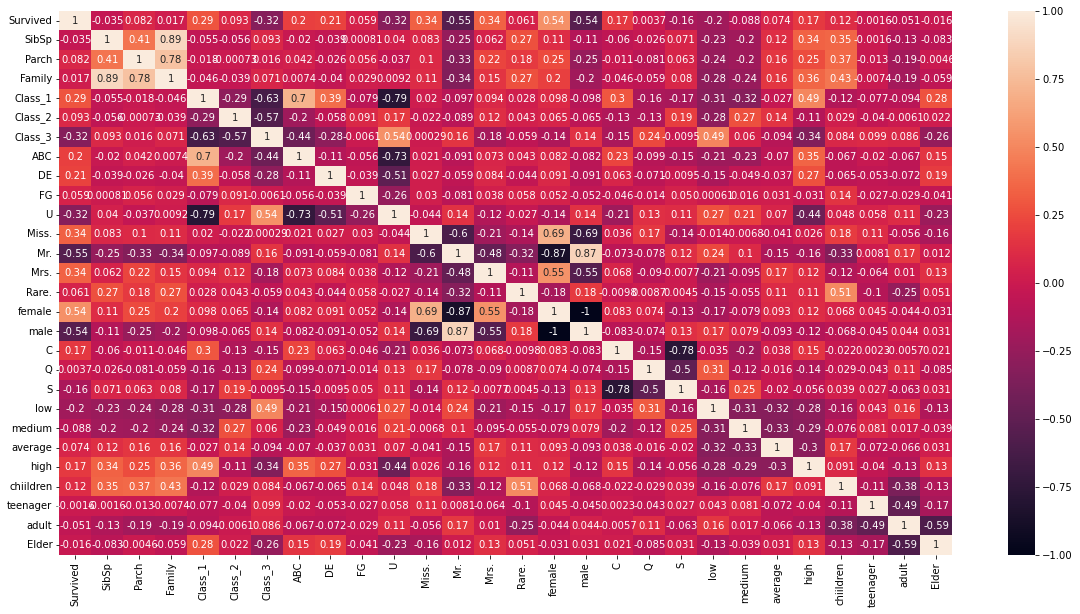

In [24]:
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(),annot=True)

In [25]:
y = train["Survived"]


In [26]:
X = train.drop(["Survived"],axis=1)

In [27]:
X

,SibSp,Parch,Family,Class_1,Class_2,Class_3,ABC,DE,FG,U,...,Q,S,low,medium,average,high,chiildren,teenager,adult,Elder
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,1,0,2,0,0,1,0,0,0,1,...,0,1,1,0,0,0,0,0,1,0
2,1,0,2,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,0,1,0,0,1,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
4,1,0,2,1,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
5,0,0,1,0,0,1,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,0,1,0,1,0,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
888,0,0,1,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
889,1,2,4,0,0,1,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier

/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [31]:
lr = LogisticRegression()
rfc = RandomForestClassifier()
dtc = DecisionTreeClassifier()
tc = ExtraTreeClassifier()

In [32]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(accuracy_score(y_pred,y_test))

0.852017937219731


In [33]:
param = [{
    "criterion": ['gini', 'entropy'],
    "n_estimators":[200,300,400,500],
    'max_depth': range(4, 20, 2),
    'max_leaf_nodes': range(4, 28, 2),
}]
#
gs_rt = GridSearchCV(rfc, param, cv = 5, n_jobs = -1, verbose = 1)
gs_rt.fit(X_train, y_train)
y_pred_rfc = gs_rt.predict(X_test)
print(gs_rt.best_estimator_)
print(accuracy_score(y_pred_rfc,y_test))

Fitting 5 folds for each of 768 candidates, totalling 3840 fits
RandomForestClassifier(max_depth=14, max_leaf_nodes=26, n_estimators=300)
0.8699551569506726


In [41]:
y_pred_rfc = gs_rt.best_estimator_.predict(X_test)
print(accuracy_score(y_pred_rfc,y_test))

0.8699551569506726


In [36]:
param = [
    {
        'criterion': ['gini', 'entropy'],
        'max_depth': range(2, 20, 2),
        'max_leaf_nodes': range(4, 28, 2),
    }
]
#
gs_dt = GridSearchCV(dtc, param, cv = 5, n_jobs = -1, verbose = 1,scoring="accuracy")
gs_dt.fit(X_train, y_train)
y_pred = gs_dt.predict(X_test)
print(accuracy_score(y_pred,y_test))
dt_gs_best = gs_dt.best_estimator_
print(gs_dt.best_estimator_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
0.8475336322869955
DecisionTreeClassifier(criterion='entropy', max_depth=8, max_leaf_nodes=10)


In [ ]:
#param = [
#    {'n_estimators': range(8, 28, 4), 
#     'max_depth': range(24, 48, 4),
#     'max_leaf_nodes': range(20, 48, 4),
#    }
#]
##
#gs_et = GridSearchCV(tc, param, cv = 5, n_jobs = -1, verbose = 1)
#gs_et.fit(X_train, y_train)
#y_pred = gs_et.predict(X_test)
#print(accuracy_score(y_pred,y_test))
#print(gs_et.best_estimator_)
#extra_best = gs_et.best_estimator_

Fitting 5 folds for each of 210 candidates, totalling 1050 fits


In [37]:
param_grid={
    'max_depth': range(2, 10, 2),
    'n_estimators': range(26, 46, 2),
    'learning_rate': [0.2, 0.1, 0.03, 0.01]
}
#
xg = XGBClassifier(eval_metric='logloss', n_jobs = -1, use_label_encoder = False)
gs_xg = GridSearchCV(xg, param_grid, cv = 5, n_jobs = -1, verbose = 1)
gs_xg.fit(X_train, y_train)
y_pred = gs_xg.predict(X_test)
print(accuracy_score(y_pred,y_test))
xboo_best = gs_xg.best_estimator_

Fitting 5 folds for each of 160 candidates, totalling 800 fits


/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype inste

0.8654708520179372


In [39]:
dtc2 = DecisionTreeClassifier(criterion="gini",max_depth=8)
bag = BaggingClassifier(base_estimator=dtc2,n_estimators=150,n_jobs=-1)
bag.fit(X_train, y_train)
y_pred_bag = bag.predict(X_test)
print(accuracy_score(y_pred_bag,y_test))

0.8654708520179372


In [45]:
test = pd.read_csv(import_path + "test.csv",index_col="PassengerId")


test["Age"].fillna(np.mean(test["Age"]),inplace=True)

def titulizer(df):
    df["Title"] = df["Name"].str.extract(r"([A-Za-z]+\.)")
    df["Title"].replace(
        ['Capt.', 'Col.','Major.',"Master.",'Master.',
         'Countess.', 'Don.', 'Dona.', 'Dr.', 'Jonkheer.', 
         'Lady.', 'Rev.', 'Sir.'], 'Rare.', 
        inplace = True)
    df["Title"].replace(['Mlle.', 'Ms.'], 'Miss.', inplace = True)
    df["Title"].replace(['Mme.'], 'Mrs.', inplace = True)
    return df

def familiazer(df):
    df["Family"] = df["SibSp"] + df["Parch"] + 1
    df["Family"] = df["Family"]
    return df

def cabinizer(df):
    df["Cabin_L"] = df["Cabin"].str.extract(r"(^\D{0,1})")
    df["Cabin_L"].fillna("U",inplace=True)
    df["Cabin_L"] = df["Cabin_L"].map({"A":"ABC","B":"ABC","C":"ABC","D":"DE","E":"DE","F":"FG","G":"FG","T":"ABC","U":"U"})
    return df

titulizer(test)
familiazer(test)
cabinizer(test)

to_drop=["Name", "Ticket","Cabin"]
test.drop(to_drop,inplace=True,axis=1)

test['Age_bin'] = pd.cut(test['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])
test['Fare_bin'] = pd.cut(test['Fare'], bins=[0,7.91,14.45,31,120], labels=['Low_fare','median_fare','Average_fare','high_fare'])

#test["Fare"] = (test["Fare"]-np.mean(test["Fare"]))/np.std(test["Fare"])
test[["Class_1","Class_2","Class_3"]] = pd.get_dummies(test["Pclass"])
test[["ABC","DE","FG","U"]] = pd.get_dummies(test["Cabin_L"])
test[["Miss.","Mr.","Mrs.","Rare."]] = pd.get_dummies(test["Title"])
test[["female","male"]] = pd.get_dummies(test["Sex"])

test[["C","Q","S"]] = pd.get_dummies(test["Embarked"])
test[["low","medium","average","high"]] = pd.get_dummies(test["Fare_bin"])
test[["chiildren","teenager","adult","Elder"]] = pd.get_dummies(test["Age_bin"])
to_drop = ["Pclass","Sex", "Embarked","Title","Fare","Age", "Cabin_L","Age_bin","Fare_bin"]
test.drop(to_drop,inplace=True, axis=1)
test

,SibSp,Parch,Family,Class_1,Class_2,Class_3,ABC,DE,FG,U,...,Q,S,low,medium,average,high,chiildren,teenager,adult,Elder
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,0,0,1,0,0,1,0,0,0,1,...,1,0,1,0,0,0,0,0,1,0
893,1,0,2,0,0,1,0,0,0,1,...,0,1,1,0,0,0,0,0,0,1
894,0,0,1,0,1,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
895,0,0,1,0,0,1,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
896,1,1,3,0,0,1,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,0,0,1,0,0,1,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
1306,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1307,0,0,1,0,0,1,0,0,0,1,...,0,1,1,0,0,0,0,0,1,0


In [46]:
submision["Survived"] = gs_rt.best_estimator_.predict(test).astype("int")
submision.to_csv('submission.csv', index = False)
